### This notebook contains only the model building, comaprision of models using sklearn and pycaret modules.

Link for HR attrition analysis part one EDA: https://www.kaggle.com/winterbreeze/ibm-hr-attrition-analysis-part-1-eda

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_column',None)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/hrattritioneda/Attrition-EDA.csv
/kaggle/input/employee-retention/employee-retention-strategy-slide13.png


In [93]:
df = pd.read_csv('/kaggle/input/hrattritioneda/Attrition-EDA.csv')
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Rarely,BusinessTravel_Travel_Frequently,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Medical,EducationField_Marketing,EducationField_Technical Degree,EducationField_Other,Gender_Male,JobRole_Sales Executive,JobRole_Research Scientist,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Healthcare Representative,JobRole_Manager,JobRole_Sales Representative,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single
0,0.446350,1,0.742527,-1.505350,-0.891688,-0.660531,1.383138,0.379672,0.112298,1.153254,0.219493,0.726020,1.660254,1.591746,-1.150554,-0.426230,-1.584178,-1.056106,-0.138921,-2.171982,-2.493820,0.177344,0.290611,-0.973342,0.245834,0.639841,-0.481859,-1.374051,1.515244,1.194045,-0.679141,-0.348255,-0.314093,-0.243059,-1.224745,1.873287,-0.497873,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650
1,1.322365,0,-1.297775,0.252002,-1.868426,0.254625,-0.240677,-1.026167,0.112298,-0.660853,-0.014600,1.488876,-0.586417,-0.628241,2.129306,2.346151,1.191438,0.471284,0.148411,0.155707,0.338096,0.774724,0.882670,-0.117271,0.806541,-1.562889,2.075297,0.727775,-0.659960,1.194045,-0.679141,-0.348255,-0.314093,-0.243059,0.816497,-0.533821,2.008543,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
2,0.008343,1,1.414363,-1.031607,-0.891688,1.169781,1.284725,-1.026167,-1.094180,0.246200,-1.366318,-1.674841,1.284860,1.591746,-0.057267,-0.426230,-0.658973,-1.056106,-0.307569,0.155707,0.338096,-2.394527,-1.736783,-0.973342,-1.155935,0.639841,-0.481859,0.727775,-0.659960,-0.837490,-0.679141,-0.348255,-0.314093,4.114223,0.816497,-0.533821,-0.497873,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650
3,-0.429664,0,1.461466,-0.695482,1.061787,1.169781,-0.486709,0.379672,-1.094180,0.246200,-0.868626,1.243211,-0.586417,1.591746,-1.150554,-0.426230,0.266233,-1.056106,-0.138921,0.155707,0.338096,0.509502,0.882670,0.738799,-1.155935,-1.562889,2.075297,0.727775,-0.659960,1.194045,-0.679141,-0.348255,-0.314093,-0.243059,-1.224745,-0.533821,2.008543,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
4,-1.086676,0,-0.524295,-1.031607,-1.868426,-1.575686,-1.274014,0.379672,-1.094180,-0.660853,-0.604032,0.325900,1.817633,-0.628241,-0.877232,-0.426230,1.191438,0.471284,-0.498767,0.155707,0.338096,-0.942513,-0.352871,0.383498,-0.595227,0.639841,-0.481859,0.727775,-0.659960,-0.837490,1.472448,-0.348255,-0.314093,-0.243059,0.816497,-0.533821,-0.497873,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565


## Extract the independent variable X and dependent variable Y

In [94]:
X=df.drop('Attrition',axis=1)
y=df['Attrition']

In [95]:
X.shape

(1470, 44)

## PCA 

##### PCA is a method used to reduce number of variables in the data by extracting important one from a large pool. It reduces the dimension of data with the aim of retaining as much information as possible.

In [96]:
cov_matirx=np.cov(X.T)
eig_vals,eig_vectors=np.linalg.eig(cov_matirx)

In [97]:
eig_vals  # The values are not in order , we need to sort the values 

array([5.27541596e+00, 3.48254334e+00, 2.14267159e+00, 2.07032491e+00,
       1.80058743e+00, 1.73081046e+00, 1.60448473e+00, 4.52165257e-03,
       1.44177438e-02, 5.06397615e-02, 6.60984934e-02, 1.01862269e-01,
       1.09515182e-01, 1.52410267e-01, 1.78308563e-01, 2.05783184e-01,
       2.23726212e-01, 2.52255188e-01, 3.10388345e-01, 5.00306448e-01,
       5.60966482e-01, 1.34613712e+00, 1.29574078e+00, 6.90690315e-01,
       7.10894808e-01, 1.22257498e+00, 7.89249215e-01, 1.18836003e+00,
       8.27358216e-01, 1.15095513e+00, 1.14506870e+00, 1.13091816e+00,
       8.65713098e-01, 9.01556851e-01, 8.95315695e-01, 9.24501654e-01,
       1.06979638e+00, 1.05358762e+00, 9.55496727e-01, 9.73582698e-01,
       9.89742990e-01, 1.03398027e+00, 1.02391564e+00, 1.00677703e+00])

In [98]:
tot=sum(eig_vals)
var_exp=[(i/tot)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print('Cumulative variance Explained:',cum_var_exp)

Cumulative variance Explained: [ 11.98142555  19.89091252  24.75730796  29.45939098  33.5488513
  37.47983547  41.12391104  44.18123237  47.12409447  49.90078378
  52.59976474  55.2137924   57.81445091  60.38297098  62.81267241
  65.20556081  67.55391735  69.8794153   72.16598836  74.41387404
  76.62505676  78.79516296  80.89487374  82.94247271  84.97589688
  86.94208819  88.82116862  90.6136966   92.22826752  93.79695038
  95.07100691  96.20729351  96.91224168  97.48515892  97.99328169
  98.46065259  98.86562364  99.21177498  99.4605038   99.69185147
  99.84197312  99.9569852   99.98973051 100.        ]


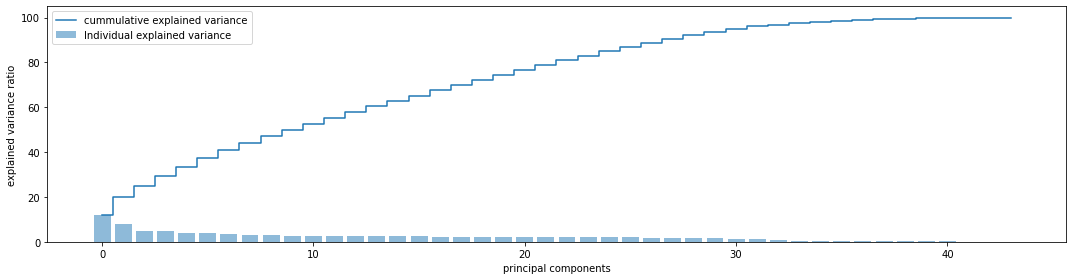

In [99]:
plt.figure(figsize=(15,4))
plt.bar(range(X.shape[1]),var_exp,alpha=0.5,align='center',label='Individual explained variance')
plt.step(range(X.shape[1]),cum_var_exp,where='mid',label='cummulative explained variance')
plt.ylabel("explained variance ratio")
plt.xlabel("principal components")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [100]:
eigen_pairs=[(np.abs(eig_vals[i]),eig_vectors[:,i]) for i in range(len(eig_vals))]

eig_val_sort=[eigen_pairs[index][0] for index in range(len(eig_vals))]
eig_vec_sort=[eigen_pairs[index][1] for index in range(len(eig_vals))]

In [101]:
eig_val_sort.sort(reverse=True)


In [102]:
P_reduce=np.array(eig_vec_sort[0:37]).T

In [103]:
projected_data=np.dot(X,P_reduce)

In [104]:
projected_data_df=pd.DataFrame(projected_data)
projected_data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,-0.505084,-2.244640,-0.812790,1.969712,0.669657,-0.115982,2.180248,0.000774,-0.018766,-0.100871,-0.038644,0.159040,0.150171,0.050025,-0.546558,-0.453199,0.592469,-0.223798,-0.063675,-0.600965,-0.403264,0.997198,-0.304760,-0.889817,0.245242,-0.797500,-1.860606,1.656186,0.432693,-0.746959,0.330023,0.956337,-0.718015,-0.652759,1.719747,-0.707070,0.921459
1,-0.489844,1.645265,-0.512040,-2.229396,-3.509944,-0.991448,0.800851,-0.000030,0.008131,0.046886,0.034918,-0.274036,0.431657,0.307052,-0.617317,-0.156682,-0.056516,0.334481,0.024426,0.437003,-1.579910,0.508571,0.426649,1.220219,0.103757,-0.467787,-0.748672,0.131123,0.674258,0.333982,-1.306297,-0.550301,-0.342901,-0.260010,-1.007970,1.500904,-1.234183
2,3.789162,0.616995,-0.024893,2.504362,0.415008,0.570490,-0.343865,0.010502,-0.035564,0.030303,0.259579,-0.228869,-0.687826,-0.352844,-0.081412,-0.132143,-0.282836,0.013997,-0.447699,0.350970,0.509903,-0.802786,-1.118536,0.642989,-0.078802,3.676441,-1.701273,-1.431078,0.093771,-0.712912,-1.020942,0.131858,-0.375880,0.793543,-0.463922,-0.881367,1.081132
3,1.021887,1.158466,-0.964283,-1.378832,0.336366,-2.735506,0.921009,0.010253,0.004500,0.073505,-0.039620,0.303070,-0.003934,0.294457,0.638481,0.352035,0.448130,0.325103,1.324658,-0.211495,0.395332,2.100860,1.028535,1.130174,1.236105,-0.021057,0.923725,0.840628,-1.002433,0.038576,-1.093305,0.003847,-0.404871,-0.348279,-0.007826,-0.139038,0.094417
4,1.997520,1.106778,1.446262,-0.241829,1.358679,0.193237,-1.848399,0.028020,0.006766,0.062314,-0.281428,-0.150329,-0.151249,-0.021861,-0.290558,0.172068,-0.006701,0.215342,0.136595,-0.838119,1.166380,-1.718698,-1.194527,0.518881,-0.195305,-0.903403,-1.529091,-0.292326,-0.182461,-0.047300,-0.839188,-0.243457,0.388301,-1.998001,0.814506,1.083551,0.230156


## Splitting the data set to train and test 

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3, stratify=y)

In [106]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X.shape)
print(y.shape)

(1029, 44)
(441, 44)
(1029,)
(441,)
(1470, 44)
(1470,)


### PCA model

Confusion matrix - Train : 
 [[842  21]
 [ 75  91]]
Overall Accuracy - Train : 0.9067055393586005
AUC - Train: 0.889604769018135
**************************************************
Confusion matrix - Test : 
 [[356  14]
 [ 46  25]]
Overall Accuracy - Test : 0.8639455782312925
AUC - Test: 0.8078416444613628
**************************************************
Cross Val Scores
[0.85435338 0.81382242 0.83963165]
Bias Error    : 16.40641842988697
Variance Error: 1.6751800453400727


Text(0, 0.5, 'TPR')

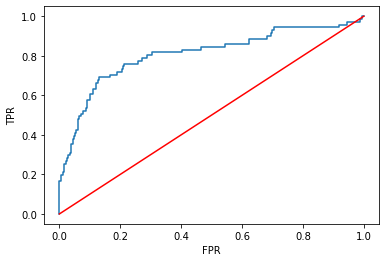

In [107]:
# Applying PCA function on training 
# and testing set of X component 
from sklearn.decomposition import PCA


pca = PCA(n_components = 37)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)                          # LOGISITC REGRESSION WITH PCA

from sklearn.linear_model import LogisticRegression
algo= LogisticRegression(random_state = 3)

algo.fit(X_train_pca , y_train)
y_train_pred = algo.predict(X_train_pca)
y_train_prob = algo.predict_proba(X_train_pca)

#overall acc of train model
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score

print('Confusion matrix - Train :', '\n',confusion_matrix(y_train , y_train_pred))
print('Overall Accuracy - Train :',accuracy_score(y_train , y_train_pred))
print('AUC - Train:', roc_auc_score(y_train , y_train_prob[:,1]))

y_test_pred = algo.predict(X_test_pca)
y_test_prob = algo.predict_proba(X_test_pca)[:,1]
print('*'*50)
print('Confusion matrix - Test :', '\n',confusion_matrix(y_test , y_test_pred))
print('Overall Accuracy - Test :',accuracy_score(y_test , y_test_pred))
print('AUC - Test:', roc_auc_score(y_test , y_test_prob))

print('*'*50)
scores=cross_val_score(algo,X,y,cv=3,scoring='roc_auc')
print('Cross Val Scores')
print(scores)
print('Bias Error    :',100-scores.mean()*100)
print('Variance Error:',scores.std()*100)



fpr , tpr , threshold = roc_curve(y_test , y_test_prob)
plt.plot(fpr , tpr)
plt.plot(fpr , fpr , 'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')


##  Building Machine Learning Models

In [108]:
from sklearn.metrics import confusion_matrix , accuracy_score , roc_auc_score , roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,KFold

# Importing all the predictive models.


lr = LogisticRegression(fit_intercept=True)
bagged_lr = BaggingClassifier(base_estimator = lr, n_estimators = 25, random_state = 3)
gnb= GaussianNB()
bnb= BernoulliNB()
mnb= MultinomialNB()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(ccp_alpha=0.01) # to increase pruning and avoid overfitting
rfc= RandomForestClassifier()
svm= SVC(probability=True)

# Declaring various classification models for the predictive model building.

### Creating a dummy classifier to know the base models predictions

In [109]:
clf=DummyClassifier(strategy='stratified')
clf.fit(X_train,y_train)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [110]:
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,

In [111]:
print('Base Score on Train Data Set: ',clf.score(X_train,y_train)) 
print('Base Score on Test Data Set : ',clf.score(X_test,y_test)) 

Base Score on Train Data Set:  0.7531584062196307
Base Score on Test Data Set :  0.7006802721088435


* now we know that our Supervised Learning Models have to perform better than the above mentioned score

In [112]:
from sklearn.metrics import classification_report

In [113]:
def model_eval(algo , X_train , y_train , X_test , y_test):

    algo.fit(X_train , y_train)
    y_pred = algo.predict(X_train)

    y_train_pred = algo.predict(X_train)               # Finding the positives and negatives 
    y_train_prob = algo.predict_proba(X_train)[:,1]    #we are intersted only in the second column


    #overall acc of train model
    print('Confusion matrix - Train :', '\n',confusion_matrix(y_train , y_train_pred))
    print('Overall Accuracy - Train :',accuracy_score(y_train , y_train_pred))
    print('AUC - Train:', roc_auc_score(y_train , y_train_prob))

    y_test_pred = algo.predict(X_test)
    y_test_prob = algo.predict_proba(X_test)[:,1]
    print('*'*50)
    print('Confusion matrix - Test :', '\n',confusion_matrix(y_test , y_test_pred))
    print('Overall Accuracy - Test :',accuracy_score(y_test , y_test_pred))
    print('AUC - Test:', roc_auc_score(y_test , y_test_prob))
    
    print('*'*50)
    scores=cross_val_score(algo,X,y,cv=3,scoring='roc_auc')
    print('Cross Val Scores')
    print(scores)
    print('Bias Error    :',100-scores.mean()*100)
    print('Variance Error:',scores.std()*100)
    
    print('\n')
    print('Classification Report:\n', classification_report(y_test, y_test_pred))
    
    

    fpr , tpr , threshold = roc_curve(y_test , y_test_prob)
    plt.plot(fpr , tpr)
    plt.plot(fpr , fpr , 'r-')
    plt.xlabel('FPR')
    plt.ylabel('TPR')

## *Logistic Regression 

Confusion matrix - Train : 
 [[843  20]
 [ 74  92]]
Overall Accuracy - Train : 0.9086491739552964
AUC - Train: 0.8981767161345267
**************************************************
Confusion matrix - Test : 
 [[350  20]
 [ 46  25]]
Overall Accuracy - Test : 0.8503401360544217
AUC - Test: 0.8092120289303387
**************************************************
Cross Val Scores
[0.85697126 0.81172811 0.83787613]
Bias Error    : 16.44748324042419
Variance Error: 1.854509872202111


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       370
           1       0.56      0.35      0.43        71

    accuracy                           0.85       441
   macro avg       0.72      0.65      0.67       441
weighted avg       0.83      0.85      0.84       441



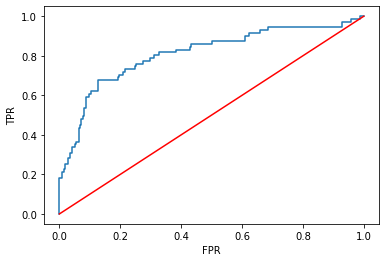

In [114]:
model_eval(bagged_lr , X_train , y_train , X_test , y_test)

In [115]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict

Bagged_Logisitc_Regression: 0.854096 (0.000480)
Ada_Boost_Logistic_Regression: 0.840965 (0.000518)
Gradient_Boost: 0.819678 (0.003874)


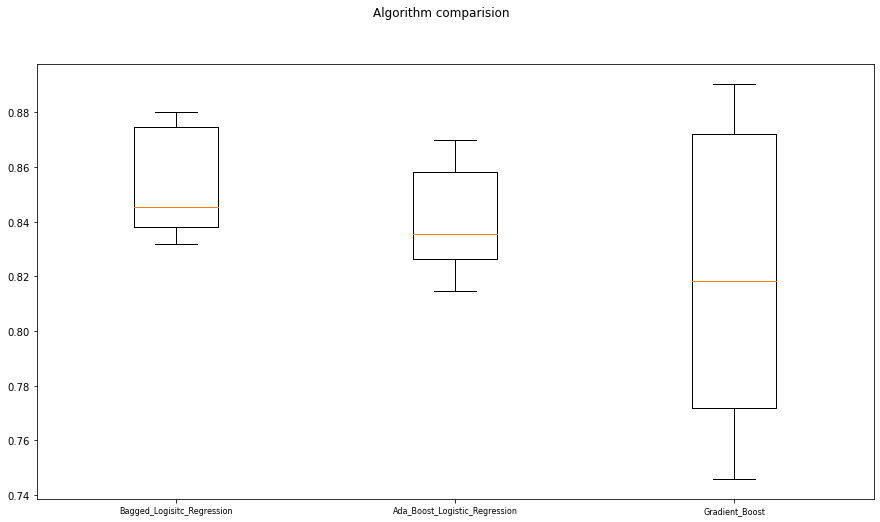

In [116]:
bagged_lr=BaggingClassifier(base_estimator=lr,n_estimators=15,random_state=3)
adaboost_lr=AdaBoostClassifier(base_estimator=lr,n_estimators=50,random_state=3)   #default decision tree
gb=GradientBoostingClassifier(n_estimators=55,random_state=3)                   # Cannot have base_estimator

models=[]
models.append(('Bagged_Logisitc_Regression',bagged_lr))
models.append(('Ada_Boost_Logistic_Regression',adaboost_lr))
models.append(('Gradient_Boost',gb))



results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=5,shuffle=True,random_state=0)
    cv_result=cross_val_score(model,X_train,y_train,cv=kfold,scoring='roc_auc')
    results.append(cv_result)
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(cv_result),np.var(cv_result,ddof=1)))
fig=plt.figure(figsize=(15,8))
fig.suptitle("Algorithm comparision")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,fontsize=8)
plt.show()

## *KNN

Confusion matrix - Train : 
 [[856   7]
 [113  53]]
Overall Accuracy - Train : 0.8833819241982507
AUC - Train: 0.9231631043292521
**************************************************
Confusion matrix - Test : 
 [[359  11]
 [ 60  11]]
Overall Accuracy - Test : 0.8390022675736961
AUC - Test: 0.6349257708412639
**************************************************
Cross Val Scores
[0.72988081 0.70319382 0.72392128]
Bias Error    : 28.10013654049503
Variance Error: 1.1437459741062264


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       370
           1       0.50      0.15      0.24        71

    accuracy                           0.84       441
   macro avg       0.68      0.56      0.57       441
weighted avg       0.80      0.84      0.80       441



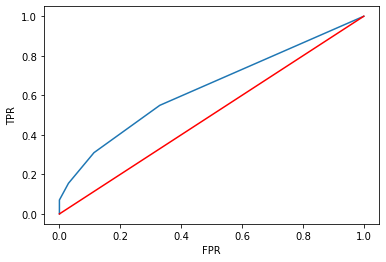

In [117]:
model_eval(knn , X_train , y_train , X_test , y_test)

Bagged_KNN: 0.723591 (0.000274)
Ada_Boost: 0.816371 (0.001445)


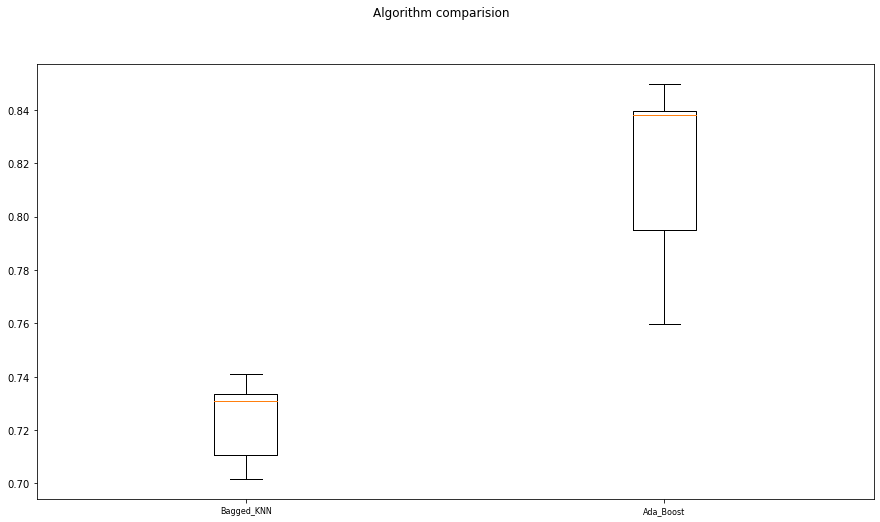

In [118]:
bagged_knn=BaggingClassifier(base_estimator=knn,n_estimators=15,random_state=3) # default DT, cannot use RandomForest
adaboost=AdaBoostClassifier(n_estimators=50,random_state=3)                    # default decision tree, cannot use KNN


models=[]
models.append(('Bagged_KNN',bagged_knn))
models.append(('Ada_Boost',adaboost))




results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=5,shuffle=True,random_state=0)
    cv_result=cross_val_score(model,X_train,y_train,cv=kfold,scoring='roc_auc')
    results.append(cv_result)
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(cv_result),np.var(cv_result,ddof=1)))
fig=plt.figure(figsize=(15,8))
fig.suptitle("Algorithm comparision")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,fontsize=8)
plt.show()

## *Naive Bayes

Confusion matrix - Train : 
 [[591 272]
 [ 36 130]]
Overall Accuracy - Train : 0.7006802721088435
AUC - Train: 0.7994178335590334
**************************************************
Confusion matrix - Test : 
 [[237 133]
 [ 22  49]]
Overall Accuracy - Test : 0.6485260770975056
AUC - Test: 0.7134754472782641
**************************************************
Cross Val Scores
[0.8009794  0.71920909 0.76152638]
Bias Error    : 23.942837783732173
Variance Error: 3.3389412731309416


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.64      0.75       370
           1       0.27      0.69      0.39        71

    accuracy                           0.65       441
   macro avg       0.59      0.67      0.57       441
weighted avg       0.81      0.65      0.69       441



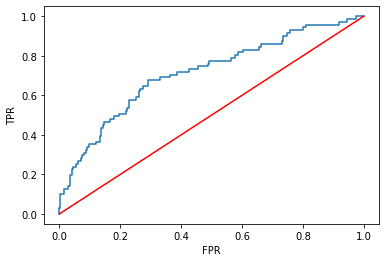

In [119]:
model_eval(gnb , X_train , y_train , X_test , y_test)

Naive_Bayes_Gaussian: 0.783202 (0.002202)
Naive_Bayes_Bernoulli: 0.782486 (0.002052)
Gaussian_bagged: 0.778417 (0.001913)
Bernoulli_bagged: 0.782074 (0.001835)
Adaboost_Gaussian: 0.649964 (0.001021)
Adaboost_Bernoulli: 0.821510 (0.002388)


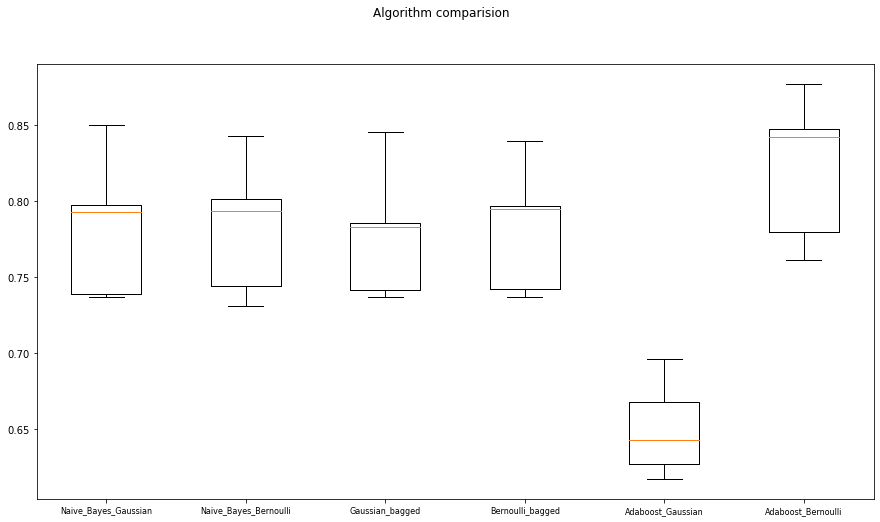

In [120]:
gnb= GaussianNB()
bnb= BernoulliNB()

gaussian_bag=BaggingClassifier(base_estimator=gnb,n_estimators=10,random_state=3)
gaussian_adaboost=AdaBoostClassifier(base_estimator=gnb,n_estimators=30,random_state=3)
bernoulli_bag=BaggingClassifier(base_estimator=bnb,n_estimators=10,random_state=3)
bernoulli_adaboost=AdaBoostClassifier(base_estimator=bnb,n_estimators=30,random_state=3)



models=[]
models.append(('Naive_Bayes_Gaussian',gnb))
models.append(('Naive_Bayes_Bernoulli',bnb))
models.append(('Gaussian_bagged',gaussian_bag))
models.append(('Bernoulli_bagged',bernoulli_bag))
models.append(('Adaboost_Gaussian',gaussian_adaboost))
models.append(('Adaboost_Bernoulli',bernoulli_adaboost))



results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=5,shuffle=True,random_state=0)
    cv_result=cross_val_score(model,X_train,y_train,cv=kfold,scoring='roc_auc')
    results.append(cv_result)
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(cv_result),np.var(cv_result,ddof=1)))
fig=plt.figure(figsize=(15,8))
fig.suptitle("Algorithm comparision")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,fontsize=8)
plt.show()

## *Decision Tree Classifier

Confusion matrix - Train : 
 [[820  43]
 [109  57]]
Overall Accuracy - Train : 0.8522837706511176
AUC - Train: 0.7197783020843513
**************************************************
Confusion matrix - Test : 
 [[348  22]
 [ 51  20]]
Overall Accuracy - Test : 0.8344671201814059
AUC - Test: 0.6899885801294252
**************************************************
Cross Val Scores
[0.58774523 0.68617758 0.65020481]
Bias Error    : 35.86241235229501
Variance Error: 4.066689467731561


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91       370
           1       0.48      0.28      0.35        71

    accuracy                           0.83       441
   macro avg       0.67      0.61      0.63       441
weighted avg       0.81      0.83      0.82       441



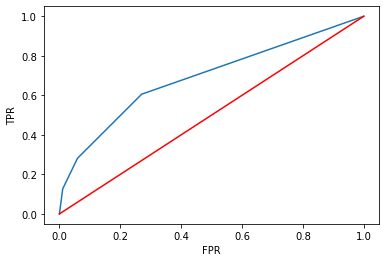

In [121]:
model_eval(dtc , X_train , y_train , X_test , y_test)

Bagged_DTC: 0.756861 (0.003511)
Adaboost_DTC: 0.816371 (0.001445)


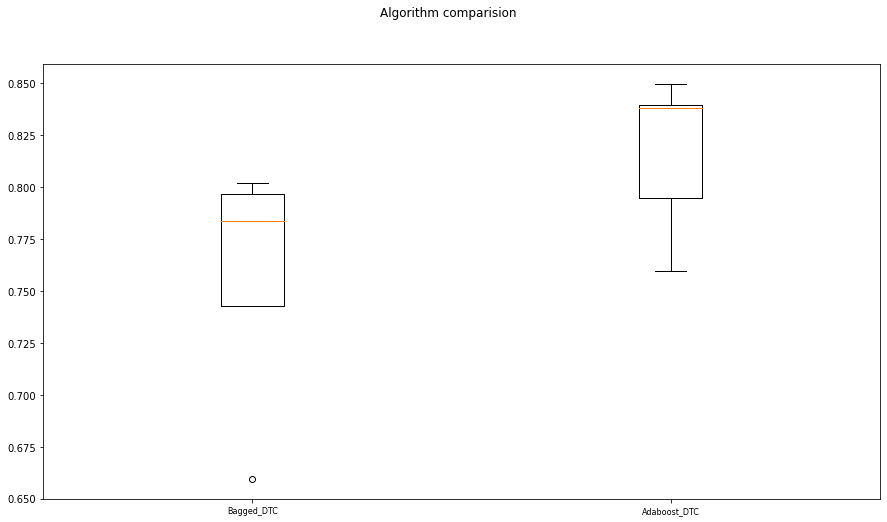

In [122]:
bagged_dtc=BaggingClassifier(n_estimators=15,random_state=3)       # default decision tree, cannot use RandomF 
adaboost_dtc=AdaBoostClassifier(n_estimators=50,random_state=3)       # default decision tree, cannot use KNN


models=[]
models.append(('Bagged_DTC',bagged_dtc))
models.append(('Adaboost_DTC',adaboost_dtc))




results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=5,shuffle=True,random_state=0)
    cv_result=cross_val_score(model,X_train,y_train,cv=kfold,scoring='roc_auc')
    results.append(cv_result)
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(cv_result),np.var(cv_result,ddof=1)))
fig=plt.figure(figsize=(15,8))
fig.suptitle("Algorithm comparision")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,fontsize=8)
plt.show()

## *Random Forest Classifier

Confusion matrix - Train : 
 [[863   0]
 [  0 166]]
Overall Accuracy - Train : 1.0
AUC - Train: 1.0
**************************************************
Confusion matrix - Test : 
 [[366   4]
 [ 64   7]]
Overall Accuracy - Test : 0.8458049886621315
AUC - Test: 0.7626570232204035
**************************************************
Cross Val Scores
[0.79169362 0.78881395 0.81103514]
Bias Error    : 20.28190992433808
Variance Error: 0.9866715378279998


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       370
           1       0.64      0.10      0.17        71

    accuracy                           0.85       441
   macro avg       0.74      0.54      0.54       441
weighted avg       0.82      0.85      0.80       441



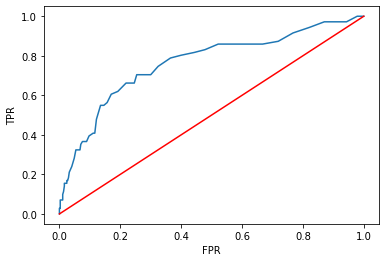

In [123]:
model_eval(rfc , X_train , y_train , X_test , y_test)

Bagged_RFC: 0.804373 (0.001453)
Adaboost_RFC: 0.802500 (0.001655)


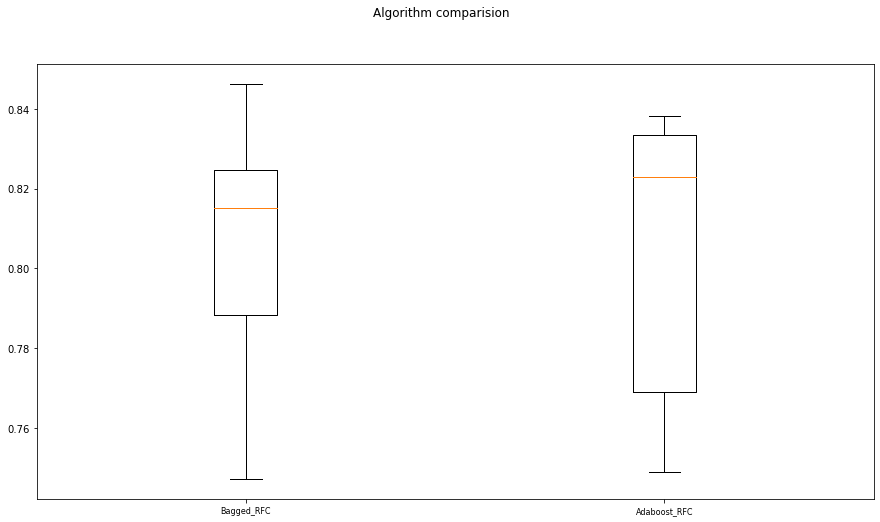

In [124]:
bagged_rfc=BaggingClassifier(base_estimator=rfc,n_estimators=15,random_state=3)       # default decision tree, cannot use RandomF 
adaboost_rfc=AdaBoostClassifier(base_estimator=rfc,n_estimators=50,random_state=3)   # default decision tree, cannot use KNN
             

models=[]
models.append(('Bagged_RFC',bagged_rfc))
models.append(('Adaboost_RFC',adaboost_rfc))




results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=5,shuffle=True,random_state=0)
    cv_result=cross_val_score(model,X_train,y_train,cv=kfold,scoring='roc_auc')
    results.append(cv_result)
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(cv_result),np.var(cv_result,ddof=1)))
fig=plt.figure(figsize=(15,8))
fig.suptitle("Algorithm comparision")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,fontsize=8)
plt.show()

## Using Randomised Search Cross Validation to Search for the best parameters 

In [125]:
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier(random_state=3)
params = { 'n_estimators' : sp_randint(50 , 200) , 
           'max_features' : sp_randint(1,26) ,
           'max_depth' : sp_randint(2,10) , 
           'min_samples_split' : sp_randint(2,10) ,
           'min_samples_leaf' : sp_randint(1,10) ,
           'criterion' : ['gini' , 'entropy']
    
}

rsearch_rfc = RandomizedSearchCV(rfc , param_distributions= params , n_iter= 200 , cv = 3 , scoring='roc_auc' , random_state= 3 , return_train_score=True , n_jobs=-1)

rsearch_rfc.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [126]:
rsearch_rfc.best_params_    

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 14,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 140}

Confusion Matrix - Train: 
 [[863   0]
 [ 81  85]]
Overall Accuracy - Train: 0.9212827988338192
AUC- Train 0.9916933085761354


Confusion Matrix - Test: 
 [[363   7]
 [ 63   8]]
Overall Accuracy - Test: 0.8412698412698413
AUC- Test 0.7711457936810049




Text(0, 0.5, 'TPR')

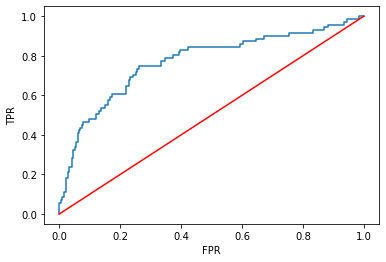

In [127]:
rfc= RandomForestClassifier(**rsearch_rfc.best_params_,random_state=3)

rfc.fit(X_train,y_train)

y_train_pred=rfc.predict(X_train)                 # Finding the Positives and Negatives 
y_train_prob=rfc.predict_proba(X_train)[:,1]      # We are interested only in the 2nd column



print('Confusion Matrix - Train:','\n' ,confusion_matrix(y_train,y_train_pred))
print('Overall Accuracy - Train:', accuracy_score(y_train,y_train_pred))             #Train
print('AUC- Train',roc_auc_score(y_train,y_train_prob))

y_test_pred=rfc.predict(X_test)
y_test_prob=rfc.predict_proba(X_test)[:,1]


print('\n')
print('Confusion Matrix - Test:','\n' ,confusion_matrix(y_test,y_test_pred))
print('Overall Accuracy - Test:', accuracy_score(y_test,y_test_pred))               #Test
print('AUC- Test',roc_auc_score(y_test,y_test_prob))

print('\n')
fpr,tpr,thresholds= roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [128]:
col_sorted_by_importance=rfc.feature_importances_.argsort()
feat_imp=pd.DataFrame({
    'cols':X.columns[col_sorted_by_importance],
    'imps':rfc.feature_importances_[col_sorted_by_importance]
})

feat_imp.sort_values(by='imps',ascending=False)[:10]

,cols,imps
43,MonthlyIncome,0.083593
42,OverTime,0.081235
41,TotalWorkingYears,0.062035
40,Age,0.060875
39,DailyRate,0.059179
38,YearsAtCompany,0.049238
37,DistanceFromHome,0.046807
36,HourlyRate,0.046387
35,MonthlyRate,0.045390
34,YearsWithCurrManager,0.038709


## *Support Vector Machines 

Confusion matrix - Train : 
 [[862   1]
 [ 67  99]]
Overall Accuracy - Train : 0.9339164237123421
AUC - Train: 0.9691814767761661
**************************************************
Confusion matrix - Test : 
 [[365   5]
 [ 58  13]]
Overall Accuracy - Test : 0.8571428571428571
AUC - Test: 0.7925390178911306
**************************************************
Cross Val Scores
[0.84486741 0.81037297 0.82312359]
Bias Error    : 17.387867401726766
Variance Error: 1.4240936451714983


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       370
           1       0.72      0.18      0.29        71

    accuracy                           0.86       441
   macro avg       0.79      0.58      0.61       441
weighted avg       0.84      0.86      0.82       441



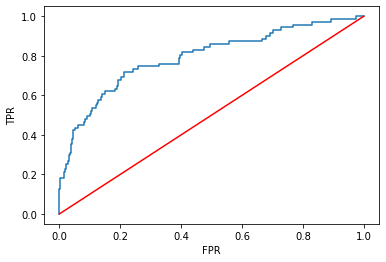

In [129]:
model_eval(svm, X_train , y_train , X_test , y_test)

In [130]:
from sklearn.svm import SVC
svm=SVC(probability=True)

kernel=['linear','poly','rbf','sigmoid']

for i in kernel:
    svm=SVC(kernel=i,C=1.0)
    svm.fit(X_train,y_train)
    print('For kernel i,',i)
    print('accuracy is' ,svm.score(X_test,y_test))

For kernel i, linear
accuracy is 0.873015873015873
For kernel i, poly
accuracy is 0.8594104308390023
For kernel i, rbf
accuracy is 0.8571428571428571
For kernel i, sigmoid
accuracy is 0.854875283446712


In [131]:
from sklearn.model_selection import GridSearchCV 
svm=SVC(probability=True,class_weight='balanced',random_state=3)
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'coef0':[0.001,10,0.5],
              'kernel': ['rbf','poly', 'sigmoid']}  
  
grid_search_svm = GridSearchCV(svm, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid_search_svm.fit(X_train,y_train) 

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[CV] C=0.1, coef0=0.001, gamma=1, kernel=rbf .........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, coef0=0.001, gamma=1, kernel=rbf, score=0.160, total=   0.4s
[CV] C=0.1, coef0=0.001, gamma=1, kernel=rbf .........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  C=0.1, coef0=0.001, gamma=1, kernel=rbf, score=0.160, total=   0.4s
[CV] C=0.1, coef0=0.001, gamma=1, kernel=rbf .........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV]  C=0.1, coef0=0.001, gamma=1, kernel=rbf, score=0.160, total=   0.4s
[CV] C=0.1, coef0=0.001, gamma=1, kernel=rbf .........................
[CV]  C=0.1, coef0=0.001, gamma=1, kernel=rbf, score=0.835, total=   0.4s
[CV] C=0.1, coef0=0.001, gamma=1, kernel=rbf .........................
[CV]  C=0.1, coef0=0.001, gamma=1, kernel=rbf, score=0.161, total=   0.4s
[CV] C=0.1, coef0=0.001, gamma=1, kernel=poly ........................
[CV]  C=0.1, coef0=0.001, gamma=1, kernel=poly, score=0.859, total=   0.2s
[CV] C=0.1, coef0=0.001, gamma=1, kernel=poly ........................
[CV]  C=0.1, coef0=0.001, gamma=1, kernel=poly, score=0.864, total=   0.2s
[CV] C=0.1, coef0=0.001, gamma=1, kernel=poly ........................
[CV]  C=0.1, coef0=0.001, gamma=1, kernel=poly, score=0.874, total=   0.2s
[CV] C=0.1, coef0=0.001, gamma=1, kernel=poly ........................
[CV]  C=0.1, coef0=0.001, gamma=1, kernel=poly, score=0.864, total=   0.2s
[CV] C=0.1, coef0=0.001, gamma=1, kernel=poly ......

[CV]  C=0.1, coef0=0.001, gamma=0.001, kernel=sigmoid, score=0.835, total=   0.4s
[CV] C=0.1, coef0=0.001, gamma=0.001, kernel=sigmoid .................
[CV]  C=0.1, coef0=0.001, gamma=0.001, kernel=sigmoid, score=0.161, total=   0.4s
[CV] C=0.1, coef0=0.001, gamma=0.0001, kernel=rbf ....................
[CV]  C=0.1, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.160, total=   0.4s
[CV] C=0.1, coef0=0.001, gamma=0.0001, kernel=rbf ....................
[CV]  C=0.1, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.160, total=   0.4s
[CV] C=0.1, coef0=0.001, gamma=0.0001, kernel=rbf ....................
[CV]  C=0.1, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.160, total=   0.4s
[CV] C=0.1, coef0=0.001, gamma=0.0001, kernel=rbf ....................
[CV]  C=0.1, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.835, total=   0.4s
[CV] C=0.1, coef0=0.001, gamma=0.0001, kernel=rbf ....................
[CV]  C=0.1, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.161, total=   0.4s
[CV] C=0.1, coe

[CV]  C=0.1, coef0=10, gamma=0.01, kernel=poly, score=0.854, total=   0.2s
[CV] C=0.1, coef0=10, gamma=0.01, kernel=sigmoid .....................
[CV]  C=0.1, coef0=10, gamma=0.01, kernel=sigmoid, score=0.160, total=   0.4s
[CV] C=0.1, coef0=10, gamma=0.01, kernel=sigmoid .....................
[CV]  C=0.1, coef0=10, gamma=0.01, kernel=sigmoid, score=0.160, total=   0.4s
[CV] C=0.1, coef0=10, gamma=0.01, kernel=sigmoid .....................
[CV]  C=0.1, coef0=10, gamma=0.01, kernel=sigmoid, score=0.160, total=   0.4s
[CV] C=0.1, coef0=10, gamma=0.01, kernel=sigmoid .....................
[CV]  C=0.1, coef0=10, gamma=0.01, kernel=sigmoid, score=0.835, total=   0.4s
[CV] C=0.1, coef0=10, gamma=0.01, kernel=sigmoid .....................
[CV]  C=0.1, coef0=10, gamma=0.01, kernel=sigmoid, score=0.161, total=   0.4s
[CV] C=0.1, coef0=10, gamma=0.001, kernel=rbf ........................
[CV]  C=0.1, coef0=10, gamma=0.001, kernel=rbf, score=0.587, total=   0.4s
[CV] C=0.1, coef0=10, gamma=0.001,

[CV]  C=0.1, coef0=0.5, gamma=0.1, kernel=poly, score=0.859, total=   0.2s
[CV] C=0.1, coef0=0.5, gamma=0.1, kernel=poly ........................
[CV]  C=0.1, coef0=0.5, gamma=0.1, kernel=poly, score=0.850, total=   0.2s
[CV] C=0.1, coef0=0.5, gamma=0.1, kernel=poly ........................
[CV]  C=0.1, coef0=0.5, gamma=0.1, kernel=poly, score=0.874, total=   0.2s
[CV] C=0.1, coef0=0.5, gamma=0.1, kernel=poly ........................
[CV]  C=0.1, coef0=0.5, gamma=0.1, kernel=poly, score=0.845, total=   0.2s
[CV] C=0.1, coef0=0.5, gamma=0.1, kernel=poly ........................
[CV]  C=0.1, coef0=0.5, gamma=0.1, kernel=poly, score=0.883, total=   0.2s
[CV] C=0.1, coef0=0.5, gamma=0.1, kernel=sigmoid .....................
[CV]  C=0.1, coef0=0.5, gamma=0.1, kernel=sigmoid, score=0.587, total=   0.3s
[CV] C=0.1, coef0=0.5, gamma=0.1, kernel=sigmoid .....................
[CV]  C=0.1, coef0=0.5, gamma=0.1, kernel=sigmoid, score=0.641, total=   0.3s
[CV] C=0.1, coef0=0.5, gamma=0.1, kernel=si

[CV]  C=1, coef0=0.001, gamma=1, kernel=rbf, score=0.840, total=   0.4s
[CV] C=1, coef0=0.001, gamma=1, kernel=rbf ...........................
[CV]  C=1, coef0=0.001, gamma=1, kernel=rbf, score=0.840, total=   0.4s
[CV] C=1, coef0=0.001, gamma=1, kernel=rbf ...........................
[CV]  C=1, coef0=0.001, gamma=1, kernel=rbf, score=0.835, total=   0.4s
[CV] C=1, coef0=0.001, gamma=1, kernel=rbf ...........................
[CV]  C=1, coef0=0.001, gamma=1, kernel=rbf, score=0.839, total=   0.4s
[CV] C=1, coef0=0.001, gamma=1, kernel=poly ..........................
[CV]  C=1, coef0=0.001, gamma=1, kernel=poly, score=0.859, total=   0.2s
[CV] C=1, coef0=0.001, gamma=1, kernel=poly ..........................
[CV]  C=1, coef0=0.001, gamma=1, kernel=poly, score=0.864, total=   0.2s
[CV] C=1, coef0=0.001, gamma=1, kernel=poly ..........................
[CV]  C=1, coef0=0.001, gamma=1, kernel=poly, score=0.874, total=   0.2s
[CV] C=1, coef0=0.001, gamma=1, kernel=poly .......................

[CV]  C=1, coef0=0.001, gamma=0.001, kernel=sigmoid, score=0.748, total=   0.3s
[CV] C=1, coef0=0.001, gamma=0.001, kernel=sigmoid ...................
[CV]  C=1, coef0=0.001, gamma=0.001, kernel=sigmoid, score=0.728, total=   0.3s
[CV] C=1, coef0=0.001, gamma=0.001, kernel=sigmoid ...................
[CV]  C=1, coef0=0.001, gamma=0.001, kernel=sigmoid, score=0.780, total=   0.3s
[CV] C=1, coef0=0.001, gamma=0.0001, kernel=rbf ......................
[CV]  C=1, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.714, total=   0.4s
[CV] C=1, coef0=0.001, gamma=0.0001, kernel=rbf ......................
[CV]  C=1, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.660, total=   0.4s
[CV] C=1, coef0=0.001, gamma=0.0001, kernel=rbf ......................
[CV]  C=1, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.714, total=   0.4s
[CV] C=1, coef0=0.001, gamma=0.0001, kernel=rbf ......................
[CV]  C=1, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.728, total=   0.4s
[CV] C=1, coef0=0.001, gam

[CV]  C=1, coef0=10, gamma=0.01, kernel=poly, score=0.854, total=   0.5s
[CV] C=1, coef0=10, gamma=0.01, kernel=sigmoid .......................
[CV]  C=1, coef0=10, gamma=0.01, kernel=sigmoid, score=0.160, total=   0.4s
[CV] C=1, coef0=10, gamma=0.01, kernel=sigmoid .......................
[CV]  C=1, coef0=10, gamma=0.01, kernel=sigmoid, score=0.160, total=   0.4s
[CV] C=1, coef0=10, gamma=0.01, kernel=sigmoid .......................
[CV]  C=1, coef0=10, gamma=0.01, kernel=sigmoid, score=0.160, total=   0.4s
[CV] C=1, coef0=10, gamma=0.01, kernel=sigmoid .......................
[CV]  C=1, coef0=10, gamma=0.01, kernel=sigmoid, score=0.835, total=   0.4s
[CV] C=1, coef0=10, gamma=0.01, kernel=sigmoid .......................
[CV]  C=1, coef0=10, gamma=0.01, kernel=sigmoid, score=0.161, total=   0.4s
[CV] C=1, coef0=10, gamma=0.001, kernel=rbf ..........................
[CV]  C=1, coef0=10, gamma=0.001, kernel=rbf, score=0.762, total=   0.3s
[CV] C=1, coef0=10, gamma=0.001, kernel=rbf ....

[CV]  C=1, coef0=0.5, gamma=0.1, kernel=poly, score=0.850, total=   0.2s
[CV] C=1, coef0=0.5, gamma=0.1, kernel=poly ..........................
[CV]  C=1, coef0=0.5, gamma=0.1, kernel=poly, score=0.874, total=   0.2s
[CV] C=1, coef0=0.5, gamma=0.1, kernel=poly ..........................
[CV]  C=1, coef0=0.5, gamma=0.1, kernel=poly, score=0.854, total=   0.2s
[CV] C=1, coef0=0.5, gamma=0.1, kernel=poly ..........................
[CV]  C=1, coef0=0.5, gamma=0.1, kernel=poly, score=0.883, total=   0.2s
[CV] C=1, coef0=0.5, gamma=0.1, kernel=sigmoid .......................
[CV]  C=1, coef0=0.5, gamma=0.1, kernel=sigmoid, score=0.539, total=   0.3s
[CV] C=1, coef0=0.5, gamma=0.1, kernel=sigmoid .......................
[CV]  C=1, coef0=0.5, gamma=0.1, kernel=sigmoid, score=0.617, total=   0.3s
[CV] C=1, coef0=0.5, gamma=0.1, kernel=sigmoid .......................
[CV]  C=1, coef0=0.5, gamma=0.1, kernel=sigmoid, score=0.578, total=   0.2s
[CV] C=1, coef0=0.5, gamma=0.1, kernel=sigmoid .......

[CV]  C=10, coef0=0.001, gamma=1, kernel=rbf, score=0.840, total=   0.4s
[CV] C=10, coef0=0.001, gamma=1, kernel=rbf ..........................
[CV]  C=10, coef0=0.001, gamma=1, kernel=rbf, score=0.835, total=   0.4s
[CV] C=10, coef0=0.001, gamma=1, kernel=rbf ..........................
[CV]  C=10, coef0=0.001, gamma=1, kernel=rbf, score=0.839, total=   0.4s
[CV] C=10, coef0=0.001, gamma=1, kernel=poly .........................
[CV]  C=10, coef0=0.001, gamma=1, kernel=poly, score=0.859, total=   0.2s
[CV] C=10, coef0=0.001, gamma=1, kernel=poly .........................
[CV]  C=10, coef0=0.001, gamma=1, kernel=poly, score=0.864, total=   0.2s
[CV] C=10, coef0=0.001, gamma=1, kernel=poly .........................
[CV]  C=10, coef0=0.001, gamma=1, kernel=poly, score=0.874, total=   0.2s
[CV] C=10, coef0=0.001, gamma=1, kernel=poly .........................
[CV]  C=10, coef0=0.001, gamma=1, kernel=poly, score=0.864, total=   0.2s
[CV] C=10, coef0=0.001, gamma=1, kernel=poly ..............

[CV]  C=10, coef0=0.001, gamma=0.001, kernel=sigmoid, score=0.806, total=   0.2s
[CV] C=10, coef0=0.001, gamma=0.001, kernel=sigmoid ..................
[CV]  C=10, coef0=0.001, gamma=0.001, kernel=sigmoid, score=0.829, total=   0.3s
[CV] C=10, coef0=0.001, gamma=0.0001, kernel=rbf .....................
[CV]  C=10, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.767, total=   0.3s
[CV] C=10, coef0=0.001, gamma=0.0001, kernel=rbf .....................
[CV]  C=10, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.777, total=   0.3s
[CV] C=10, coef0=0.001, gamma=0.0001, kernel=rbf .....................
[CV]  C=10, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.767, total=   0.3s
[CV] C=10, coef0=0.001, gamma=0.0001, kernel=rbf .....................
[CV]  C=10, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.752, total=   0.3s
[CV] C=10, coef0=0.001, gamma=0.0001, kernel=rbf .....................
[CV]  C=10, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.805, total=   0.3s
[CV] C=10, coef0=0.001

[CV]  C=10, coef0=10, gamma=0.01, kernel=sigmoid, score=0.160, total=   0.4s
[CV] C=10, coef0=10, gamma=0.01, kernel=sigmoid ......................
[CV]  C=10, coef0=10, gamma=0.01, kernel=sigmoid, score=0.160, total=   0.4s
[CV] C=10, coef0=10, gamma=0.01, kernel=sigmoid ......................
[CV]  C=10, coef0=10, gamma=0.01, kernel=sigmoid, score=0.160, total=   0.4s
[CV] C=10, coef0=10, gamma=0.01, kernel=sigmoid ......................
[CV]  C=10, coef0=10, gamma=0.01, kernel=sigmoid, score=0.835, total=   0.4s
[CV] C=10, coef0=10, gamma=0.01, kernel=sigmoid ......................
[CV]  C=10, coef0=10, gamma=0.01, kernel=sigmoid, score=0.161, total=   0.4s
[CV] C=10, coef0=10, gamma=0.001, kernel=rbf .........................
[CV]  C=10, coef0=10, gamma=0.001, kernel=rbf, score=0.786, total=   0.2s
[CV] C=10, coef0=10, gamma=0.001, kernel=rbf .........................
[CV]  C=10, coef0=10, gamma=0.001, kernel=rbf, score=0.796, total=   0.2s
[CV] C=10, coef0=10, gamma=0.001, kernel=

[CV]  C=10, coef0=0.5, gamma=0.1, kernel=poly, score=0.874, total=   0.2s
[CV] C=10, coef0=0.5, gamma=0.1, kernel=poly .........................
[CV]  C=10, coef0=0.5, gamma=0.1, kernel=poly, score=0.854, total=   0.2s
[CV] C=10, coef0=0.5, gamma=0.1, kernel=poly .........................
[CV]  C=10, coef0=0.5, gamma=0.1, kernel=poly, score=0.883, total=   0.2s
[CV] C=10, coef0=0.5, gamma=0.1, kernel=sigmoid ......................
[CV]  C=10, coef0=0.5, gamma=0.1, kernel=sigmoid, score=0.529, total=   0.3s
[CV] C=10, coef0=0.5, gamma=0.1, kernel=sigmoid ......................
[CV]  C=10, coef0=0.5, gamma=0.1, kernel=sigmoid, score=0.607, total=   0.2s
[CV] C=10, coef0=0.5, gamma=0.1, kernel=sigmoid ......................
[CV]  C=10, coef0=0.5, gamma=0.1, kernel=sigmoid, score=0.597, total=   0.2s
[CV] C=10, coef0=0.5, gamma=0.1, kernel=sigmoid ......................
[CV]  C=10, coef0=0.5, gamma=0.1, kernel=sigmoid, score=0.641, total=   0.2s
[CV] C=10, coef0=0.5, gamma=0.1, kernel=sigm

[CV]  C=100, coef0=0.001, gamma=1, kernel=rbf, score=0.835, total=   0.4s
[CV] C=100, coef0=0.001, gamma=1, kernel=rbf .........................
[CV]  C=100, coef0=0.001, gamma=1, kernel=rbf, score=0.839, total=   0.4s
[CV] C=100, coef0=0.001, gamma=1, kernel=poly ........................
[CV]  C=100, coef0=0.001, gamma=1, kernel=poly, score=0.859, total=   0.2s
[CV] C=100, coef0=0.001, gamma=1, kernel=poly ........................
[CV]  C=100, coef0=0.001, gamma=1, kernel=poly, score=0.864, total=   0.2s
[CV] C=100, coef0=0.001, gamma=1, kernel=poly ........................
[CV]  C=100, coef0=0.001, gamma=1, kernel=poly, score=0.874, total=   0.2s
[CV] C=100, coef0=0.001, gamma=1, kernel=poly ........................
[CV]  C=100, coef0=0.001, gamma=1, kernel=poly, score=0.864, total=   0.2s
[CV] C=100, coef0=0.001, gamma=1, kernel=poly ........................
[CV]  C=100, coef0=0.001, gamma=1, kernel=poly, score=0.883, total=   0.2s
[CV] C=100, coef0=0.001, gamma=1, kernel=sigmoid ..

[CV]  C=100, coef0=0.001, gamma=0.001, kernel=sigmoid, score=0.801, total=   0.2s
[CV] C=100, coef0=0.001, gamma=0.001, kernel=sigmoid .................
[CV]  C=100, coef0=0.001, gamma=0.001, kernel=sigmoid, score=0.829, total=   0.2s
[CV] C=100, coef0=0.001, gamma=0.0001, kernel=rbf ....................
[CV]  C=100, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.782, total=   0.2s
[CV] C=100, coef0=0.001, gamma=0.0001, kernel=rbf ....................
[CV]  C=100, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.796, total=   0.2s
[CV] C=100, coef0=0.001, gamma=0.0001, kernel=rbf ....................
[CV]  C=100, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.786, total=   0.2s
[CV] C=100, coef0=0.001, gamma=0.0001, kernel=rbf ....................
[CV]  C=100, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.791, total=   0.2s
[CV] C=100, coef0=0.001, gamma=0.0001, kernel=rbf ....................
[CV]  C=100, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.829, total=   0.2s
[CV] C=100, coe

[CV]  C=100, coef0=10, gamma=0.01, kernel=poly, score=0.859, total=   0.7s
[CV] C=100, coef0=10, gamma=0.01, kernel=sigmoid .....................
[CV]  C=100, coef0=10, gamma=0.01, kernel=sigmoid, score=0.160, total=   0.4s
[CV] C=100, coef0=10, gamma=0.01, kernel=sigmoid .....................
[CV]  C=100, coef0=10, gamma=0.01, kernel=sigmoid, score=0.160, total=   0.4s
[CV] C=100, coef0=10, gamma=0.01, kernel=sigmoid .....................
[CV]  C=100, coef0=10, gamma=0.01, kernel=sigmoid, score=0.160, total=   0.4s
[CV] C=100, coef0=10, gamma=0.01, kernel=sigmoid .....................
[CV]  C=100, coef0=10, gamma=0.01, kernel=sigmoid, score=0.835, total=   0.4s
[CV] C=100, coef0=10, gamma=0.01, kernel=sigmoid .....................
[CV]  C=100, coef0=10, gamma=0.01, kernel=sigmoid, score=0.161, total=   0.4s
[CV] C=100, coef0=10, gamma=0.001, kernel=rbf ........................
[CV]  C=100, coef0=10, gamma=0.001, kernel=rbf, score=0.816, total=   0.3s
[CV] C=100, coef0=10, gamma=0.001,

[CV]  C=100, coef0=0.5, gamma=0.1, kernel=poly, score=0.859, total=   0.2s
[CV] C=100, coef0=0.5, gamma=0.1, kernel=poly ........................
[CV]  C=100, coef0=0.5, gamma=0.1, kernel=poly, score=0.850, total=   0.2s
[CV] C=100, coef0=0.5, gamma=0.1, kernel=poly ........................
[CV]  C=100, coef0=0.5, gamma=0.1, kernel=poly, score=0.874, total=   0.2s
[CV] C=100, coef0=0.5, gamma=0.1, kernel=poly ........................
[CV]  C=100, coef0=0.5, gamma=0.1, kernel=poly, score=0.854, total=   0.2s
[CV] C=100, coef0=0.5, gamma=0.1, kernel=poly ........................
[CV]  C=100, coef0=0.5, gamma=0.1, kernel=poly, score=0.883, total=   0.2s
[CV] C=100, coef0=0.5, gamma=0.1, kernel=sigmoid .....................
[CV]  C=100, coef0=0.5, gamma=0.1, kernel=sigmoid, score=0.534, total=   0.2s
[CV] C=100, coef0=0.5, gamma=0.1, kernel=sigmoid .....................
[CV]  C=100, coef0=0.5, gamma=0.1, kernel=sigmoid, score=0.607, total=   0.2s
[CV] C=100, coef0=0.5, gamma=0.1, kernel=si

[CV]  C=1000, coef0=0.001, gamma=1, kernel=rbf, score=0.840, total=   0.4s
[CV] C=1000, coef0=0.001, gamma=1, kernel=rbf ........................
[CV]  C=1000, coef0=0.001, gamma=1, kernel=rbf, score=0.840, total=   0.4s
[CV] C=1000, coef0=0.001, gamma=1, kernel=rbf ........................
[CV]  C=1000, coef0=0.001, gamma=1, kernel=rbf, score=0.835, total=   0.4s
[CV] C=1000, coef0=0.001, gamma=1, kernel=rbf ........................
[CV]  C=1000, coef0=0.001, gamma=1, kernel=rbf, score=0.839, total=   0.4s
[CV] C=1000, coef0=0.001, gamma=1, kernel=poly .......................
[CV]  C=1000, coef0=0.001, gamma=1, kernel=poly, score=0.859, total=   0.2s
[CV] C=1000, coef0=0.001, gamma=1, kernel=poly .......................
[CV]  C=1000, coef0=0.001, gamma=1, kernel=poly, score=0.864, total=   0.2s
[CV] C=1000, coef0=0.001, gamma=1, kernel=poly .......................
[CV]  C=1000, coef0=0.001, gamma=1, kernel=poly, score=0.874, total=   0.2s
[CV] C=1000, coef0=0.001, gamma=1, kernel=poly

[CV]  C=1000, coef0=0.001, gamma=0.001, kernel=sigmoid, score=0.820, total=   0.6s
[CV] C=1000, coef0=0.001, gamma=0.001, kernel=sigmoid ................
[CV]  C=1000, coef0=0.001, gamma=0.001, kernel=sigmoid, score=0.762, total=   0.5s
[CV] C=1000, coef0=0.001, gamma=0.001, kernel=sigmoid ................
[CV]  C=1000, coef0=0.001, gamma=0.001, kernel=sigmoid, score=0.816, total=   0.6s
[CV] C=1000, coef0=0.001, gamma=0.001, kernel=sigmoid ................
[CV]  C=1000, coef0=0.001, gamma=0.001, kernel=sigmoid, score=0.829, total=   0.6s
[CV] C=1000, coef0=0.001, gamma=0.0001, kernel=rbf ...................
[CV]  C=1000, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.811, total=   0.3s
[CV] C=1000, coef0=0.001, gamma=0.0001, kernel=rbf ...................
[CV]  C=1000, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.811, total=   0.3s
[CV] C=1000, coef0=0.001, gamma=0.0001, kernel=rbf ...................
[CV]  C=1000, coef0=0.001, gamma=0.0001, kernel=rbf, score=0.772, total=   0.3s
[C

[CV]  C=1000, coef0=10, gamma=0.01, kernel=poly, score=0.791, total=   0.6s
[CV] C=1000, coef0=10, gamma=0.01, kernel=poly .......................
[CV]  C=1000, coef0=10, gamma=0.01, kernel=poly, score=0.825, total=   0.6s
[CV] C=1000, coef0=10, gamma=0.01, kernel=poly .......................
[CV]  C=1000, coef0=10, gamma=0.01, kernel=poly, score=0.859, total=   0.7s
[CV] C=1000, coef0=10, gamma=0.01, kernel=sigmoid ....................
[CV]  C=1000, coef0=10, gamma=0.01, kernel=sigmoid, score=0.160, total=   0.4s
[CV] C=1000, coef0=10, gamma=0.01, kernel=sigmoid ....................
[CV]  C=1000, coef0=10, gamma=0.01, kernel=sigmoid, score=0.160, total=   0.4s
[CV] C=1000, coef0=10, gamma=0.01, kernel=sigmoid ....................
[CV]  C=1000, coef0=10, gamma=0.01, kernel=sigmoid, score=0.160, total=   0.4s
[CV] C=1000, coef0=10, gamma=0.01, kernel=sigmoid ....................
[CV]  C=1000, coef0=10, gamma=0.01, kernel=sigmoid, score=0.835, total=   0.4s
[CV] C=1000, coef0=10, gamma=0

[CV]  C=1000, coef0=0.5, gamma=0.1, kernel=rbf, score=0.830, total=   0.4s
[CV] C=1000, coef0=0.5, gamma=0.1, kernel=rbf ........................
[CV]  C=1000, coef0=0.5, gamma=0.1, kernel=rbf, score=0.839, total=   0.4s
[CV] C=1000, coef0=0.5, gamma=0.1, kernel=poly .......................
[CV]  C=1000, coef0=0.5, gamma=0.1, kernel=poly, score=0.859, total=   0.2s
[CV] C=1000, coef0=0.5, gamma=0.1, kernel=poly .......................
[CV]  C=1000, coef0=0.5, gamma=0.1, kernel=poly, score=0.850, total=   0.2s
[CV] C=1000, coef0=0.5, gamma=0.1, kernel=poly .......................
[CV]  C=1000, coef0=0.5, gamma=0.1, kernel=poly, score=0.874, total=   0.2s
[CV] C=1000, coef0=0.5, gamma=0.1, kernel=poly .......................
[CV]  C=1000, coef0=0.5, gamma=0.1, kernel=poly, score=0.854, total=   0.2s
[CV] C=1000, coef0=0.5, gamma=0.1, kernel=poly .......................
[CV]  C=1000, coef0=0.5, gamma=0.1, kernel=poly, score=0.883, total=   0.2s
[CV] C=1000, coef0=0.5, gamma=0.1, kernel=si

[CV]  C=1000, coef0=0.5, gamma=0.0001, kernel=sigmoid, score=0.801, total=   0.2s
[CV] C=1000, coef0=0.5, gamma=0.0001, kernel=sigmoid .................
[CV]  C=1000, coef0=0.5, gamma=0.0001, kernel=sigmoid, score=0.820, total=   0.2s


[Parallel(n_jobs=1)]: Done 1125 out of 1125 | elapsed:  6.7min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=3, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'coef0': [0.001, 10, 0.5],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [132]:
# print best parameter after tuning 
print(grid_search_svm.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_search_svm.best_estimator_) 

{'C': 10, 'coef0': 0.001, 'gamma': 0.01, 'kernel': 'poly'}
SVC(C=10, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.001, decision_function_shape='ovr', degree=3, gamma=0.01,
    kernel='poly', max_iter=-1, probability=True, random_state=3,
    shrinking=True, tol=0.001, verbose=False)


Confusion Matrix - Train: 
 [[863   0]
 [ 69  97]]
Overall Accuracy - Train: 0.9329446064139941
AUC- Train 0.9948903377123791


Confusion Matrix - Test: 
 [[367   3]
 [ 59  12]]
Overall Accuracy - Test: 0.8594104308390023
AUC- Test 0.7404263418347925




Text(0, 0.5, 'TPR')

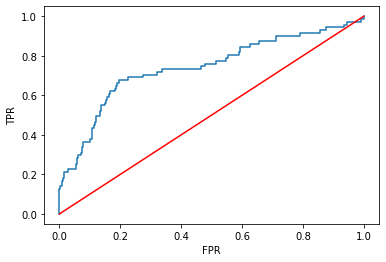

In [133]:
svm= SVC(probability=True,**grid_search_svm.best_params_,random_state=3)

svm.fit(X_train,y_train)

y_train_pred=svm.predict(X_train)                 # Finding the Positives and Negatives 
y_train_prob=svm.predict_proba(X_train)[:,1]      # We are interested only in the 2nd column



print('Confusion Matrix - Train:','\n' ,confusion_matrix(y_train,y_train_pred))
print('Overall Accuracy - Train:', accuracy_score(y_train,y_train_pred))             #Train
print('AUC- Train',roc_auc_score(y_train,y_train_prob))

y_test_pred=svm.predict(X_test)
y_test_prob=svm.predict_proba(X_test)[:,1]


print('\n')
print('Confusion Matrix - Test:','\n' ,confusion_matrix(y_test,y_test_pred))
print('Overall Accuracy - Test:', accuracy_score(y_test,y_test_pred))               #Test
print('AUC- Test',roc_auc_score(y_test,y_test_prob))

print('\n')
fpr,tpr,thresholds= roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

Bagged_SVM: 0.809757 (0.000972)
Adaboost_SVM: 0.756344 (0.002382)
Gradient_Boost: 0.819678 (0.003874)


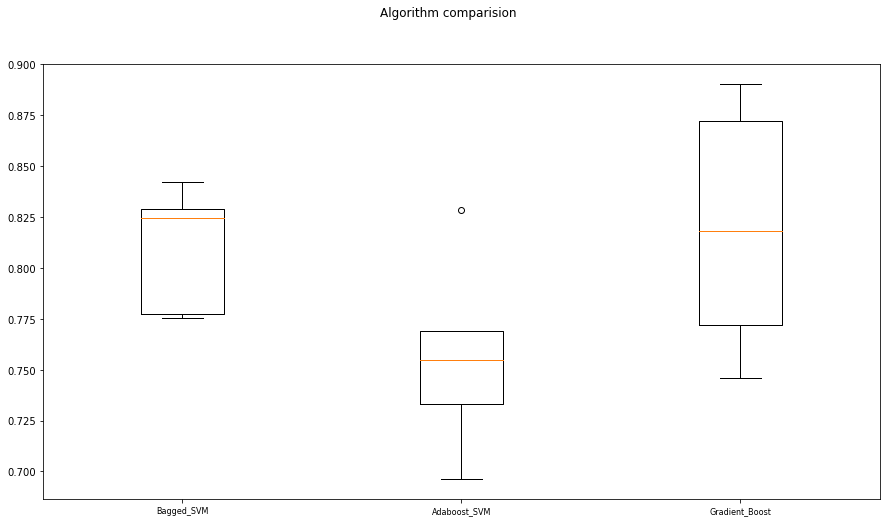

In [134]:
bagged_svm=BaggingClassifier(base_estimator=svm,n_estimators=15,random_state=3)       # default decision tree, cannot use RandomF 
adaboost_svm=AdaBoostClassifier(base_estimator=svm,n_estimators=15,random_state=3)   # default decision tree, cannot use KNN
gb_lr=GradientBoostingClassifier(n_estimators=55,random_state=3)                # Does not have base_estimator, uses DT as stump

models=[]
models.append(('Bagged_SVM',bagged_svm))
models.append(('Adaboost_SVM',adaboost_svm))
models.append(('Gradient_Boost',gb_lr))



results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=5,shuffle=True,random_state=0)
    cv_result=cross_val_score(model,X_train,y_train,cv=kfold,scoring='roc_auc')
    results.append(cv_result)
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(cv_result),np.var(cv_result,ddof=1)))
fig=plt.figure(figsize=(15,8))
fig.suptitle("Algorithm comparision")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,fontsize=8)
plt.show()

## Over Sampling Minority Class

In [135]:
Xytrain=pd.concat([X_train,y_train],axis=1)

print('Before Oversampling:','\n',Xytrain['Attrition'].value_counts())

Xytrain0=Xytrain[Xytrain['Attrition']==0]
Xytrain1=Xytrain[Xytrain['Attrition']==1]

len0=len(Xytrain0)
len1=len(Xytrain1)

Xytrain1_os=Xytrain1.sample(len0,replace=True,random_state=3) # To duplicate the values when over sampling [replace=True]
Xytrain_os=pd.concat([Xytrain0,Xytrain1_os],axis=0)           # Axis 0 because it is appending and not merging 

print('\n')
print('After Oversampling:','\n',Xytrain_os['Attrition'].value_counts())

Before Oversampling: 
 0    863
1    166
Name: Attrition, dtype: int64


After Oversampling: 
 1    863
0    863
Name: Attrition, dtype: int64


In [136]:
X_os=Xytrain_os.drop('Attrition',axis=1)
y_os=Xytrain_os['Attrition']

In [137]:
from sklearn.model_selection import train_test_split
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_os, y_os, test_size=0.3, random_state=3)

In [138]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_os_scaled = ss.fit_transform(X_train_os)
X_test_os_scaled = ss.transform(X_test_os)

Confusion matrix - Train : 
 [[597  14]
 [ 26 571]]
Overall Accuracy - Train : 0.9668874172185431
AUC - Train: 0.9932669347830259
**************************************************
Confusion matrix - Test : 
 [[231  21]
 [ 22 244]]
Overall Accuracy - Test : 0.916988416988417
AUC - Test: 0.976921470342523
**************************************************
Cross Val Scores
[0.84486741 0.81037297 0.82312359]
Bias Error    : 17.387867401726766
Variance Error: 1.4240936451714983


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       252
           1       0.92      0.92      0.92       266

    accuracy                           0.92       518
   macro avg       0.92      0.92      0.92       518
weighted avg       0.92      0.92      0.92       518



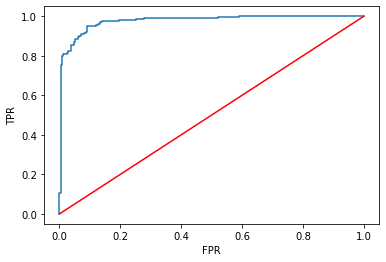

In [139]:
svm_os= SVC(probability=True)
model_eval(svm_os, X_train_os_scaled , y_train_os , X_test_os_scaled , y_test_os)

## SMOTE (Synthetic Minority Oversampling TEchnique)

In [140]:
from imblearn.over_sampling import SMOTE,SVMSMOTE

In [141]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state = 7)

smote=SVMSMOTE(sampling_strategy='minority',random_state=3)
X_train_sm,y_train_sm=smote.fit_sample(X_train,y_train)

In [142]:
#smote = SMOTE(sampling_strategy = 'minority', random_state = 3)
#X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

Confusion Matrix - Train: 
 [[844  18]
 [ 34 828]]
Overall Accuracy - Train: 0.9698375870069605
AUC- Train 0.9937863706590726


Confusion Matrix - Test: 
 [[347  24]
 [ 39  31]]
Overall Accuracy - Test: 0.8571428571428571
AUC- Test 0.8052753176742395




Text(0, 0.5, 'TPR')

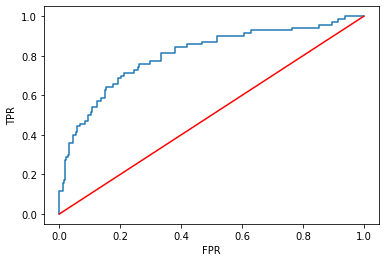

In [143]:
svm= SVC(probability=True)

svm.fit(X_train_sm,y_train_sm)

y_train_pred=svm.predict(X_train_sm)                 # Finding the Positives and Negatives 
y_train_prob=svm.predict_proba(X_train_sm)[:,1]      # We are interested only in the 2nd column



print('Confusion Matrix - Train:','\n' ,confusion_matrix(y_train_sm,y_train_pred))
print('Overall Accuracy - Train:', accuracy_score(y_train_sm,y_train_pred))             #Train
print('AUC- Train',roc_auc_score(y_train_sm,y_train_prob))

y_test_pred=svm.predict(X_test)
y_test_prob=svm.predict_proba(X_test)[:,1]


print('\n')
print('Confusion Matrix - Test:','\n' ,confusion_matrix(y_test,y_test_pred))
print('Overall Accuracy - Test:', accuracy_score(y_test,y_test_pred))               #Test
print('AUC- Test',roc_auc_score(y_test,y_test_prob))

print('\n')
fpr,tpr,thresholds= roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

## *ADASUN (Adaptive Synthetic Sampling)

In [144]:
from imblearn.over_sampling import ADASYN 
adasyn = ADASYN(sampling_strategy='auto')

In [145]:
X_train_adasyn,y_train_adasyn=adasyn.fit_sample(X_train,y_train)
y_train_adasyn.value_counts()

0    862
1    815
Name: Attrition, dtype: int64

Confusion matrix - Train : 
 [[840  22]
 [ 10 805]]
Overall Accuracy - Train : 0.9809183064997018
AUC - Train: 0.9988840334220603
**************************************************
Confusion matrix - Test : 
 [[340  31]
 [ 39  31]]
Overall Accuracy - Test : 0.8412698412698413
AUC - Test: 0.7843280708509819
**************************************************
Cross Val Scores
[0.84486741 0.81037297 0.82312359]
Bias Error    : 17.387867401726766
Variance Error: 1.4240936451714983


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       371
           1       0.50      0.44      0.47        70

    accuracy                           0.84       441
   macro avg       0.70      0.68      0.69       441
weighted avg       0.83      0.84      0.84       441



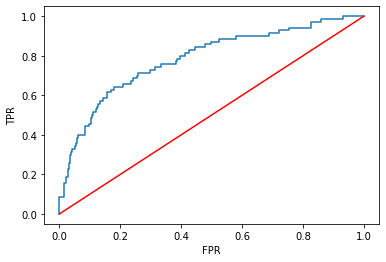

In [146]:
model_eval(svm, X_train_adasyn , y_train_adasyn , X_test , y_test)

## *LightGBM

In [147]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

params = {
    'n_estimators' : sp_randint(50,200) , 
    'max_depth' : sp_randint(2,15) ,
    'learning_rate' : sp_uniform(0.001 , 0.5 ) ,
    'num_leaves' : sp_randint(20 , 50) 
} 


rsearch = RandomizedSearchCV(lgbm , param_distributions= params , cv = 3 , n_iter= 200 , n_jobs=-1 ,random_state= 3)

rsearch.fit(X , y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, sile...
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f77d63f5b1

In [148]:
rsearch.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.4515072751602209,
               max_depth=13, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=71, n_jobs=-1, num_leaves=48,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

Confusion Matrix - Train: 
 [[862   0]
 [  0 167]]
Overall Accuracy - Train: 1.0
AUC- Train 1.0


Confusion Matrix - Test: 
 [[352  19]
 [ 47  23]]
Overall Accuracy - Test: 0.8503401360544217
AUC- Test 0.7924913361571044




Text(0, 0.5, 'TPR')

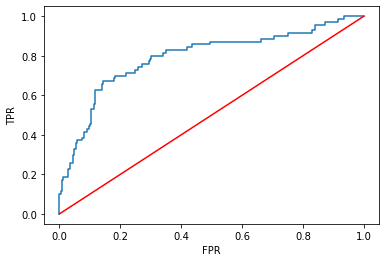

In [149]:
lgbm= lgb.LGBMClassifier(**rsearch.best_params_)

lgbm.fit(X_train,y_train)

y_train_pred=lgbm.predict(X_train)                 # Finding the Positives and Negatives 
y_train_prob=lgbm.predict_proba(X_train)[:,1]      # We are interested only in the 2nd column

print('Confusion Matrix - Train:','\n' ,confusion_matrix(y_train,y_train_pred))
print('Overall Accuracy - Train:', accuracy_score(y_train,y_train_pred))             #Train
print('AUC- Train',roc_auc_score(y_train,y_train_prob))

y_test_pred=lgbm.predict(X_test)
y_test_prob=lgbm.predict_proba(X_test)[:,1]


print('\n')
print('Confusion Matrix - Test:','\n' ,confusion_matrix(y_test,y_test_pred))
print('Overall Accuracy - Test:', accuracy_score(y_test,y_test_pred))               #Test
print('AUC- Test',roc_auc_score(y_test,y_test_prob))

print('\n')
fpr,tpr,thresholds= roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

## * XGBoost

In [150]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

params = {
        'min_child_weight': [1,2,3,4,5,6,7,8,9,10],
        'gamma': [0.5, 1,1,1.25,1.35,1.45, 1.5,1.75, 2, 5],
        'subsample': [0.6,0.7 ,0.8,0.9, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0,1.1,1.2],
        'max_depth': [3, 4, 5,6,7]
        }

xgb = XGBClassifier(learning_rate=0.02, n_estimators=1000, objective='binary:logistic',
                    silent=True, nthread=1)

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 3)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=4, cv=skf.split(X,y), verbose=3, random_state=3 )

random_search.fit(X, y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    6.7s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f77d5f5a650>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child_wei...
                                           verbosity=None),
                   iid='deprecated', n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0, 1.1,
                                                

Confusion Matrix - Train: 
 [[861   1]
 [ 27 140]]
Overall Accuracy - Train: 0.9727891156462585
AUC- Train 0.9933520430137406


Confusion Matrix - Test: 
 [[354  17]
 [ 45  25]]
Overall Accuracy - Test: 0.8594104308390023
AUC- Test 0.8055833654216404




Text(0, 0.5, 'TPR')

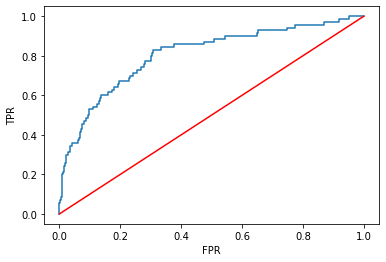

In [151]:
xgb= XGBClassifier(**random_search.best_params_,random_state=3)

xgb.fit(X_train,y_train)

y_train_pred=xgb.predict(X_train)                 # Finding the Positives and Negatives 
y_train_prob=xgb.predict_proba(X_train)[:,1]      # We are interested only in the 2nd column



print('Confusion Matrix - Train:','\n' ,confusion_matrix(y_train,y_train_pred))
print('Overall Accuracy - Train:', accuracy_score(y_train,y_train_pred))             #Train
print('AUC- Train',roc_auc_score(y_train,y_train_prob))

y_test_pred=xgb.predict(X_test)
y_test_prob=xgb.predict_proba(X_test)[:,1]


print('\n')
print('Confusion Matrix - Test:','\n' ,confusion_matrix(y_test,y_test_pred))
print('Overall Accuracy - Test:', accuracy_score(y_test,y_test_pred))               #Test
print('AUC- Test',roc_auc_score(y_test,y_test_prob))

print('\n')
fpr,tpr,thresholds= roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [152]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
svm=SVC(probability=True)

In [153]:
stacked=VotingClassifier(estimators=[('Bagged_Logistic_Regression',bagged_lr),('Adaboost_Bernoulli_Naive_Bayes',bernoulli_adaboost),('GBOOst',gb),('Bagged_RandomForest',bagged_rfc),('Support_Vector_Machines',svm)],voting='soft')

Bagged_Logistic_Regression: 0.837661 (0.000904)
Adaboost_Bernoulli_Naive_Bayes: 0.817592 (0.000996)
GBOOst: 0.806475 (0.001035)
Bagged_RandomForest: 0.814819 (0.002038)
Support_Vector_Machines: 0.836742 (0.001482)
Stacked: 0.842746 (0.001244)


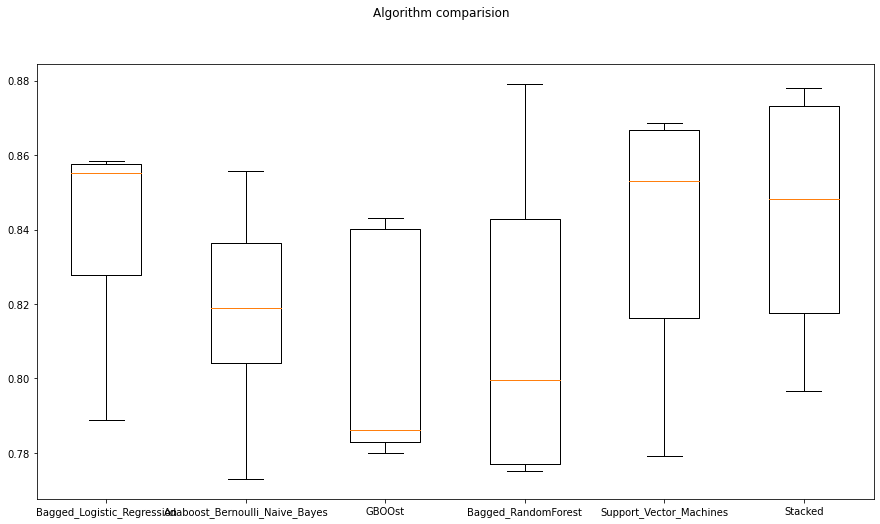

In [154]:
models=[]
models.append(('Bagged_Logistic_Regression',bagged_lr))
models.append(('Adaboost_Bernoulli_Naive_Bayes',bernoulli_adaboost))
models.append(('GBOOst',gb))
models.append(('Bagged_RandomForest',bagged_rfc))
models.append(('Support_Vector_Machines',svm))
models.append(('Stacked',stacked))


results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=5,shuffle=True,random_state=0)
    cv_result=cross_val_score(model,X,y,cv=kfold,scoring='roc_auc')
    results.append(cv_result)
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(cv_result),np.var(cv_result,ddof=1)))
fig=plt.figure(figsize=(15,8))
fig.suptitle("Algorithm comparision")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [155]:
stacked11=VotingClassifier(estimators=[('Bagged_Logistic_Regression',bagged_lr),('GBOOst',gb),('Support_Vector_Machines',svm)],voting='soft')

Bagged_Logistic_Regression: 0.837661 (0.000904)
GBOOst: 0.806475 (0.001035)
Support_Vector_Machines: 0.836742 (0.001482)
Stacked: 0.842947 (0.001238)


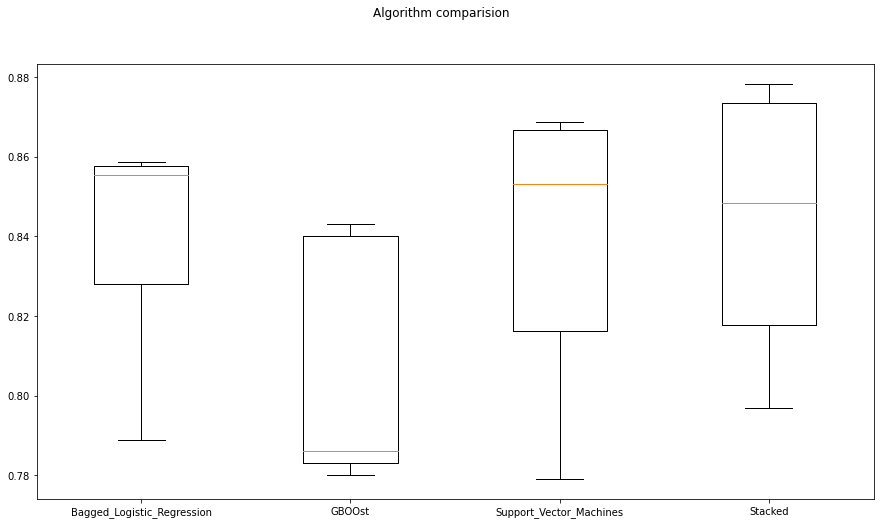

In [156]:
models=[]
models.append(('Bagged_Logistic_Regression',bagged_lr))
models.append(('GBOOst',gb))
models.append(('Support_Vector_Machines',svm))
models.append(('Stacked',stacked))


results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=5,shuffle=True,random_state=0)
    cv_result=cross_val_score(model,X,y,cv=kfold,scoring='roc_auc')
    results.append(cv_result)
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(cv_result),np.var(cv_result,ddof=1)))
fig=plt.figure(figsize=(15,8))
fig.suptitle("Algorithm comparision")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## ** Using Pycaret to assess which model is best  

In [157]:
data=pd.read_csv('/kaggle/input/hrattritioneda/Attrition-EDA.csv')
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Rarely,BusinessTravel_Travel_Frequently,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Medical,EducationField_Marketing,EducationField_Technical Degree,EducationField_Other,Gender_Male,JobRole_Sales Executive,JobRole_Research Scientist,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Healthcare Representative,JobRole_Manager,JobRole_Sales Representative,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single
0,0.446350,1,0.742527,-1.505350,-0.891688,-0.660531,1.383138,0.379672,0.112298,1.153254,0.219493,0.726020,1.660254,1.591746,-1.150554,-0.426230,-1.584178,-1.056106,-0.138921,-2.171982,-2.493820,0.177344,0.290611,-0.973342,0.245834,0.639841,-0.481859,-1.374051,1.515244,1.194045,-0.679141,-0.348255,-0.314093,-0.243059,-1.224745,1.873287,-0.497873,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650
1,1.322365,0,-1.297775,0.252002,-1.868426,0.254625,-0.240677,-1.026167,0.112298,-0.660853,-0.014600,1.488876,-0.586417,-0.628241,2.129306,2.346151,1.191438,0.471284,0.148411,0.155707,0.338096,0.774724,0.882670,-0.117271,0.806541,-1.562889,2.075297,0.727775,-0.659960,1.194045,-0.679141,-0.348255,-0.314093,-0.243059,0.816497,-0.533821,2.008543,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
2,0.008343,1,1.414363,-1.031607,-0.891688,1.169781,1.284725,-1.026167,-1.094180,0.246200,-1.366318,-1.674841,1.284860,1.591746,-0.057267,-0.426230,-0.658973,-1.056106,-0.307569,0.155707,0.338096,-2.394527,-1.736783,-0.973342,-1.155935,0.639841,-0.481859,0.727775,-0.659960,-0.837490,-0.679141,-0.348255,-0.314093,4.114223,0.816497,-0.533821,-0.497873,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650
3,-0.429664,0,1.461466,-0.695482,1.061787,1.169781,-0.486709,0.379672,-1.094180,0.246200,-0.868626,1.243211,-0.586417,1.591746,-1.150554,-0.426230,0.266233,-1.056106,-0.138921,0.155707,0.338096,0.509502,0.882670,0.738799,-1.155935,-1.562889,2.075297,0.727775,-0.659960,1.194045,-0.679141,-0.348255,-0.314093,-0.243059,-1.224745,-0.533821,2.008543,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
4,-1.086676,0,-0.524295,-1.031607,-1.868426,-1.575686,-1.274014,0.379672,-1.094180,-0.660853,-0.604032,0.325900,1.817633,-0.628241,-0.877232,-0.426230,1.191438,0.471284,-0.498767,0.155707,0.338096,-0.942513,-0.352871,0.383498,-0.595227,0.639841,-0.481859,0.727775,-0.659960,-0.837490,1.472448,-0.348255,-0.314093,-0.243059,0.816497,-0.533821,-0.497873,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565


In [159]:
from pycaret.classification import *
clf=setup(data,target='Attrition')

Setup Succesfully Completed!


,Description,Value
0,session_id,2876
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(1470, 45)"
4,Missing Values,False
5,Numeric Features,22
6,Categorical Features,22
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [160]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Logistic Regression,0.8697,0.8193,0.3743,0.6779,0.4763,0.4099,0.4362,0.0479
1,Ridge Classifier,0.8639,0.0000,0.2062,0.8167,0.3242,0.2788,0.3622,0.0084
2,Linear Discriminant Analysis,0.8629,0.8184,0.3680,0.6449,0.4647,0.3927,0.4151,0.0147
3,Gradient Boosting Classifier,0.8619,0.7786,0.2952,0.6724,0.4061,0.3415,0.3805,0.4281
4,Ada Boost Classifier,0.8609,0.7896,0.3676,0.6237,0.4584,0.3853,0.4050,0.2027
5,CatBoost Classifier,0.8580,0.7867,0.1989,0.7400,0.3084,0.2578,0.3290,3.1995
6,Light Gradient Boosting Machine,0.8522,0.7541,0.2599,0.6069,0.3598,0.2917,0.3269,0.1601
7,Extra Trees Classifier,0.8493,0.7694,0.1934,0.6626,0.2910,0.2328,0.2928,0.3783
8,K Neighbors Classifier,0.8473,0.6534,0.1511,0.6350,0.2389,0.1888,0.2517,0.0083
9,Extreme Gradient Boosting,0.8473,0.7534,0.2360,0.5782,0.3304,0.2618,0.2969,0.4021


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2876, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [161]:
from pycaret.classification import *
clf=setup(data,target='Attrition',normalize=True,
    normalize_method='zscore',
    transformation=True,
    transformation_method='yeo-johnson')

Setup Succesfully Completed!


,Description,Value
0,session_id,8842
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(1470, 45)"
4,Missing Values,False
5,Numeric Features,22
6,Categorical Features,22
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [162]:
compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Logistic Regression,0.8823,0.8350,0.4515,0.7081,0.5450,0.4830,0.5017,0.0476
1,Linear Discriminant Analysis,0.8775,0.8318,0.4460,0.6805,0.5348,0.4691,0.4844,0.0140
2,CatBoost Classifier,0.8629,0.8093,0.2415,0.6998,0.3542,0.3009,0.3547,3.1907
3,Ada Boost Classifier,0.8589,0.8041,0.3489,0.6102,0.4398,0.3669,0.3875,0.1964
4,Gradient Boosting Classifier,0.8639,0.7999,0.2842,0.6630,0.3939,0.3341,0.3725,0.4237
5,Extra Trees Classifier,0.8696,0.7886,0.3129,0.7031,0.4252,0.3670,0.4079,0.3463
6,Extreme Gradient Boosting,0.8551,0.7831,0.3015,0.6018,0.3964,0.3259,0.3528,0.3869
7,Naive Bayes,0.6070,0.7771,0.7952,0.2653,0.3973,0.2040,0.2705,0.0055
8,Random Forest Classifier,0.8580,0.7755,0.2169,0.6942,0.3254,0.2712,0.3305,0.1146
9,Light Gradient Boosting Machine,0.8639,0.7748,0.3092,0.6699,0.4130,0.3507,0.3875,0.1560


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=8842, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [163]:
lr.classes_ = np.array([-1, 1])

In [164]:
tuned_lr= tune_model(lr,optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8835,0.8413,0.5294,0.6923,0.6000,0.5332,0.5398
1,0.8350,0.7668,0.1765,0.5000,0.2609,0.1912,0.2244
2,0.9223,0.9179,0.6471,0.8462,0.7333,0.6888,0.6973
3,0.8738,0.8646,0.5294,0.6429,0.5806,0.5072,0.5105
4,0.8544,0.8269,0.3529,0.6000,0.4444,0.3671,0.3842
5,0.8835,0.7503,0.4706,0.7273,0.5714,0.5076,0.5237
6,0.8738,0.8448,0.4375,0.6364,0.5185,0.4487,0.4592
7,0.9223,0.8448,0.5625,0.9000,0.6923,0.6506,0.6741
8,0.8725,0.8525,0.3750,0.6667,0.4800,0.4138,0.4361
9,0.8627,0.8198,0.4375,0.5833,0.5000,0.4223,0.4282


In [165]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [166]:
final_lr_model=finalize_model(tuned_lr)

In [167]:
print(final_lr_model)

LogisticRegression(C=3.299, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=8842, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [168]:
predictions=predict_model(final_lr_model,data=data)
predictions.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Healthcare Representative,JobRole_Manager,JobRole_Sales Representative,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single,Label,Score
0,0.446350,1,0.742527,-1.505350,-0.891688,-0.660531,1.383138,0.379672,0.112298,1.153254,...,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650,1,0.6176
1,1.322365,0,-1.297775,0.252002,-1.868426,0.254625,-0.240677,-1.026167,0.112298,-0.660853,...,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565,0,0.0275
2,0.008343,1,1.414363,-1.031607,-0.891688,1.169781,1.284725,-1.026167,-1.094180,0.246200,...,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650,1,0.5829
3,-0.429664,0,1.461466,-0.695482,1.061787,1.169781,-0.486709,0.379672,-1.094180,0.246200,...,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565,0,0.1821
4,-1.086676,0,-0.524295,-1.031607,-1.868426,-1.575686,-1.274014,0.379672,-1.094180,-0.660853,...,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565,0,0.2239


In [169]:
columns=[column for column in predictions.columns if (column!='Attrition') & (column!='Label') &(column!='Score')]
columns= columns + ['Attrition','Label','Score']
predictions=predictions[columns]

In [170]:
predictions['Attrition'].unique()

array([1, 0])

In [171]:
predictions['Label'].unique()

array([1, 0])

In [172]:
predictions.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Healthcare Representative,JobRole_Manager,JobRole_Sales Representative,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single,Attrition,Label,Score
0,0.446350,0.742527,-1.505350,-0.891688,-0.660531,1.383138,0.379672,0.112298,1.153254,0.219493,...,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650,1,1,0.6176
1,1.322365,-1.297775,0.252002,-1.868426,0.254625,-0.240677,-1.026167,0.112298,-0.660853,-0.014600,...,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565,0,0,0.0275
2,0.008343,1.414363,-1.031607,-0.891688,1.169781,1.284725,-1.026167,-1.094180,0.246200,-1.366318,...,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650,1,1,0.5829
3,-0.429664,1.461466,-0.695482,1.061787,1.169781,-0.486709,0.379672,-1.094180,0.246200,-0.868626,...,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565,0,0,0.1821
4,-1.086676,-0.524295,-1.031607,-1.868426,-1.575686,-1.274014,0.379672,-1.094180,-0.660853,-0.604032,...,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565,0,0,0.2239


##### So we conclude that the best model we are getting is Logistic Regression model and now we can fit this model with the required predictor variables and predict the attrition of an employee. This is a versatile model and can be implemented in any organization to analyse their previous employee base and check the attrition.

## Some of the proven employee retention statergies.

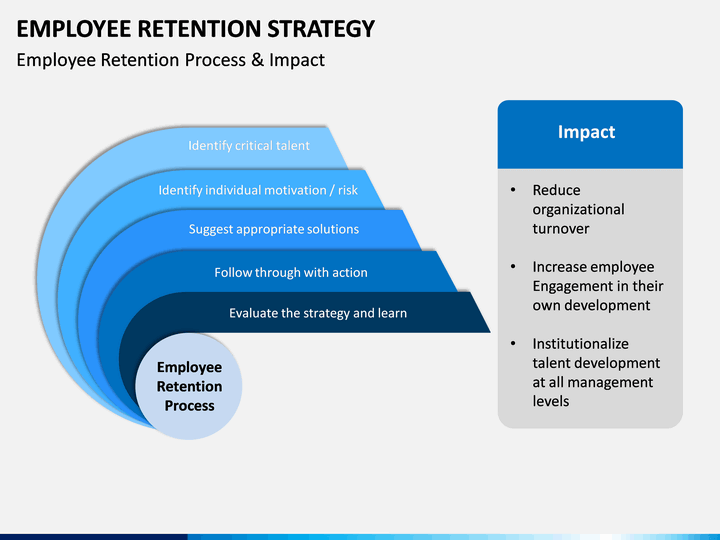

In [173]:
from PIL import Image
Image.open('/kaggle/input/employee-retention/employee-retention-strategy-slide13.png')

Below is a link to article in site questionpro explaining some of the retention statergies.

[https://www.questionpro.com/blog/employee-retention-strategies/](http://)

## The END 